<a href="https://colab.research.google.com/github/avpakh/wta_prognoz/blob/master/Update_WTA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка данных  (тестовая выгрузка 2007 - 2022)

In [1]:

import pandas as pd
import numpy as np
import requests

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=8)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

url = "https://raw.githubusercontent.com/avpakh/wta_prognoz/master/dataset.csv"
response = requests.get(url)
dest = 'C:\\Projects\\dataset1.csv' # локальный

with open(dest, 'wb') as file:
    file.write(response.content)

df = pd.read_csv(dest,sep='^')

#df = df.loc[(df.winner == 'Williams S.') | (df.loser == 'Williams S.') ] 

# Приведение дат к единому формату

df['match_date'] = pd.to_datetime(df['match_date'].str.strip(), format='%Y-%m-%d')
df['dob_winner'] = pd.to_datetime(df['dob_winner'].str.strip(), format='%Y-%m-%d')
df['dob_loser'] = pd.to_datetime(df['dob_loser'].str.strip(), format='%Y-%m-%d')

In [2]:
print(df.shape)
print(list(df.columns))

(36746, 30)
['id_testdataset', 'match_date', 'tourney_name', 'tourney_location', 'tier', 'court', 'surface', 'round', 'winner', 'loser', 'winner_id', 'hand_class_winner', 'dob_winner', 'height_winner', 'loser_id', 'hand_class_loser', 'dob_loser', 'height_loser', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points', 'bio_phi_winner', 'bio_emo_winner', 'bio_int_winner', 'critical_winner', 'bio_phi_loser', 'bio_emo_loser', 'bio_int_loser', 'critical_loser']


Входные данные:

1.   match_date (дата) - день встречи
2.   tourney_name (char) - наименование турнира
3.   tourney_location (char) - место проведения турнира
4.   tier (char) - уровень турнира
5.   court (char) - тип корта (outdoors or indoors)
6.   surface (сhar) - покрытие (clay, hard, carpet or grass)
7.   round (char) - очередность матчей (первый уровень ... финал)
8.   winner_id (int) - уникальный идентификатор выгравшей теннисистки 
9.   loser_id (int) - уникальный идентификатор проигравшей теннисистки
10.  winner (char) - фамилия и имя победительницы 
11.  loser (char)  - фамилия и имя проигравшей
12.  hand_class_winner (сhar) - рабочая рука победительницы (L,R,U) 
13.  hand_class_loser (сhar) - рабочая рука проигравшей (L,R,U)
14.  dob_winner (дата) - день рождения победительницы
15.  dob_loser (дата) - день рождения проигравшей
16.  winner_rank (int) - WTA рейтинг победительницы на начало соревнования
17.  loser_rank (int) - WTA рейтинг проигравшей на начало соревнования
18.  winner_rank_points (int) - Количество турнирных очков победительницы на начало соревнования
19.  loser_rank_points (int) - Количество турнирных очков проигравшей на начало соревнования
20.  bio_phi_winner (float) - физический индекс победительницы (0-200)
21.  bio_emo_winner (float) - эмоциональный индекс победительницы (0-200)
22.  bio_int_winner (float) - интеллект. индекс победительницы (0-200)
23.  bio_phi_loser (float) - физический индекс проигравшей (0-200)
24.  bio_emo_loser (float) - эмоциональный индекс проигравшей (0-200)
25.  bio_int_loser (float) - интеллект. индекс проигравшей (0-200)


II. Создание дополнительных парных индексов (выгравшая - проигравшая, проигравшая - выгравшая)

1. diff_phi (float) - разница физических индексов выгравшей и проигравшей
2. diff_emo (float) - разница эмоциональных индексов выгравшей и проигравшей
3. diff_int (float)  - разница интеллектуальных индексов выгравшей и проигравшей
4. combine_winner (float) - cумма трех индексов выйгравшей
5. combine_loser (float) - cумма трех индексов проигравшей
6. age_winner (int) - возраст победительницы (дней ) на дату встречи
7. age_loser (int) - возраст проигравшей (дней ) на дату встречи
8. diff_age (int) - разница в возрасте победительницы и проигравшей
9. diff_rank (int) - разница в рейтингах выгравшей и проигравшей


In [3]:
df['diff_phi1']  = df['bio_phi_winner'] -  df['bio_phi_loser']
df['diff_emo1']  = df['bio_emo_winner'] -  df['bio_emo_loser']
df['diff_int1']  = df['bio_int_winner'] -  df['bio_int_loser']
df['diff_age1'] = (df['dob_winner'] - df['dob_loser']).dt.days
df['diff_phi2']  = df['bio_phi_loser'] - df['bio_phi_winner']
df['diff_emo2']  = df['bio_emo_loser'] - df['bio_emo_winner']
df['diff_int2']  = df['bio_int_loser'] -  df['bio_int_winner']
df['diff_age2'] = (df['dob_loser'] - df['dob_winner']).dt.days
df['combine_winner'] = df['bio_phi_winner'] + df['bio_emo_winner'] +  df['bio_int_winner']
df['combine_loser'] = df['bio_phi_loser'] + df['bio_emo_loser'] + df['bio_int_loser']
df['age_winner'] =  (df['match_date'] - df['dob_winner'] ).dt.days
df['age_loser'] =   (df['match_date'] - df['dob_loser'] ).dt.days
df['diff1'] = df['combine_winner'] - df['combine_loser']
df['diff2'] = df['combine_loser'] - df['combine_winner']
df['diff_rank1'] = df['winner_rank']- df['loser_rank']
df['diff_rank2'] = df['loser_rank'] - df['winner_rank']


**3. Создание единого датасета с результатом  y = 1 для победителя и y = 0 для проигравшего**

3.1 Удаление несвязанных полей для победительницы и проигравшей

3.2 Удаление категорированных полей из общего датасета

3.3 Создание общей выборки для анализа путем использования общих полей для выборки


In [4]:
df_winner = df
df_loser  = df

df_winner = df_winner.drop(columns=['age_loser','combine_loser','loser_id','height_loser','loser_rank','loser_rank_points','height_loser','hand_class_loser','dob_loser','bio_phi_loser','bio_emo_loser','bio_int_loser','loser','critical_loser','diff_age2','diff2','diff_phi2','diff_emo2','diff_int2','diff_rank2'])
df_winner['y'] = 1

df_loser = df_loser.drop(columns=['age_winner','combine_winner','winner_id','height_winner','winner_rank','winner_rank_points','height_winner','hand_class_winner','dob_winner','bio_phi_winner','bio_emo_winner','bio_int_winner','winner','critical_winner','diff_age1','diff1','diff_phi1','diff_emo1','diff_int1','diff_rank1'])
df_loser['y'] = 0

df_winner.rename(columns = {'age_winner':'age','combine_winner':'combine','winner':'player', 'hand_class_winner': 'hand_class','winner_id':'player_id',
                            'dob_winner': 'dob', 'height_winner' : 'height', 'winner_rank':'rank', 'winner_rank_points':'points', 'bio_phi_winner': 'bio_phi',
                            'bio_emo_winner' : 'bio_emo',  'bio_int_winner' : 'bio_int' , 'critical_winner':'critical','diff_age1':'diff_age',
                            'diff_phi1':'diff_phi','diff_emo1':'diff_emo','diff_int1':'diff_int','diff1':'diff','diff_rank1':'diff_rank'}, inplace = True)
df_loser.rename(columns = {'age_loser':'age','combine_loser': 'combine','loser':'player', 'hand_class_loser': 'hand_class','loser_id':'player_id',
                           'dob_loser': 'dob', 'height_loser' : 'height', 'loser_rank':'rank', 'loser_rank_points':'points', 'bio_phi_loser':
                           'bio_phi', 'bio_emo_loser' : 'bio_emo',  'bio_int_loser' : 'bio_int' , 'critical_loser':'critical',
                            'diff_age2':'diff_age',  'diff_phi2':'diff_phi','diff_emo2':'diff_emo','diff_int2':'diff_int','diff2':'diff','diff_rank2':'diff_rank'}, inplace = True)


joint_dataset = pd.concat([df_winner, df_loser], axis=0)



In [ ]:
joint_dataset = joint_dataset.drop(columns = ['id_testdataset',	'match_date','tourney_name','tourney_location','height','critical','dob','player','player_id','tier','court','round','surface','hand_class'],axis=1)

print (joint_dataset.info())

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [7]:
temp = clean_dataset(joint_dataset)
y = temp['y']
temp = temp.drop(columns=['y'])
X =temp

In [8]:
data_final_vars=joint_dataset.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
print (X)


['rank', 'points', 'bio_phi', 'bio_emo', 'bio_int', 'diff_phi', 'diff_emo', 'diff_int', 'diff_age', 'combine', 'age', 'diff', 'diff_rank']


**4. Определение значимых характеристик(признаков) с помощью  Recursive Feature Elimination в Scikit-Learn**

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

joint_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

logreg = LogisticRegression(max_iter=1000)

rfe = RFE(logreg, step = 1)
# rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=4)

rfe = rfe.fit(joint_dataset[X], joint_dataset[y], )
print(rfe.support_)
print(rfe.ranking_)
print (type(X))

In [10]:
cols = []

_support = rfe.support_.tolist()
_ranking = rfe.ranking_.tolist()
_xval = list(X) 

print (_support,_ranking)

for idx in range(len(_support)):
    if ((_support[idx]) ==1 and (_ranking[idx] == True)):
        cols.append(_xval[idx])

print (cols)

X=joint_dataset[cols]
y=joint_dataset['y']

print (X.shape)

[True, True, False, False, False, False, True, False, False, True, True, False, True] [1, 1, 2, 3, 7, 6, 1, 4, 8, 1, 1, 5, 1]
['rank', 'points', 'diff_emo', 'combine', 'age', 'diff_rank']
(73360, 6)


**5. Имплементация модели**

In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.642697
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                73360
Model:                          Logit   Df Residuals:                    73354
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Oct 2022   Pseudo R-squ.:                 0.07278
Time:                        06:59:40   Log-Likelihood:                -47148.
converged:                       True   LL-Null:                       -50849.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank           0.0031      0.000     17.907      0.000       0.003       0.003
points         0.0002    6.5e

Значения p-values для большинства очень малое следовательно  - большинство из них значимы для модели

**6. Подбор модели логистической регрессии и выбор оптимальной модели**

In [12]:
from scipy.sparse.construct import rand
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import metrics
logreg = LogisticRegression()
dt_cv = DecisionTreeClassifier()
knn_cv = KNeighborsClassifier()
nb_cv = BernoulliNB()

cv_models = [logreg, dt_cv, knn_cv, nb_cv]

cv_dict = {0: 'Логистическая регрессия', 1: 'Дерево решений', 2: 'Метод k ближайших соседей', 3: 'Наивный байесовский классификатор'}

for i,model in enumerate(cv_models):
  print("{} | Тестовая точность измерений: {}".format(cv_dict[i], cross_val_score(model, X, y, cv = 20, scoring = 'accuracy').mean()))

logreg.fit(X_train, y_train)


Логистическая регрессия | Тестовая точность измерений: 0.6392175572519083
Дерево решений | Тестовая точность измерений: 0.5579334787350054
Метод k ближайших соседей | Тестовая точность измерений: 0.573773173391494
Наивный байесовский классификатор | Тестовая точность измерений: 0.6483369683751363


LogisticRegression()

**7. Предсказание результов по тестовым данным и расчет точности вычислений для модели логистической регрессии**

In [13]:
y_pred = logreg.predict(X_test)

In [14]:
print(' Точность вычислений по тестовым данным : {:.5f}'.format(logreg.score(X_test, y_test)))

 Точность вычислений по тестовым данным : 0.63727


**8. Анализ средней точности измерений**

In [15]:
param_grid = {'C': np.logspace(-4, 4, 50),'penalty': ['l1', 'l2']}

clf = GridSearchCV(LogisticRegression(random_state = 0,C=1, penalty='l1', solver='liblinear'), param_grid, cv = 15, verbose = 0, n_jobs = -1,error_score='raise')

best_model = clf.fit(X_train, y_train)
print(best_model.best_estimator_)
print("Средняя точность измерений:", best_model.score(X_test, y_test))

LogisticRegression(C=7.9060432109076855, penalty='l1', random_state=0,
                   solver='liblinear')
Средняя точность измерений: 0.6358505997818975


**9. Кроссвалидация модели**

In [16]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=10,shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
results = cross_val_score(clf, X, y, cv=cv)
print("cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.642


KeyboardInterrupt: ignored

**10.Вычисление матрицы ошибок для оценки точности классификации**

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred,normalize=None)
print(confusion_matrix)

[[12436  5966]
 [ 7339 10939]]


Результат показывает число корректных предсказаний  11415 (true positive) + 10237 (true negative) и ошибок классификации 8041 (false negative) + 6987 ( false positive)

**11.  Вычисление характеристик(метрик) точности предсказания **

На каждом из классов (y = [0,1]) 
1. precision (точность) - отношение tp / (tp + fp)  - доля объектов названных положительными и в действительности являющимися положительными 
2. recall (полнота) -  отношение tp / (tp + fn) показывает долю объектов положительного класса из всех объектов положительного класса которую 
нашел алгоритм
3. f1-score -  f-мера — среднее гармоническое precision и recall
 f = 1 при наилучшем результате и 0  при наухудшем
4. support - количество значений из каждого класса в y_test

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65     18402
           1       0.65      0.60      0.62     18278

    accuracy                           0.64     36680
   macro avg       0.64      0.64      0.64     36680
weighted avg       0.64      0.64      0.64     36680



**11. Метрики  AUC-ROC и AUC-PR**


AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR)


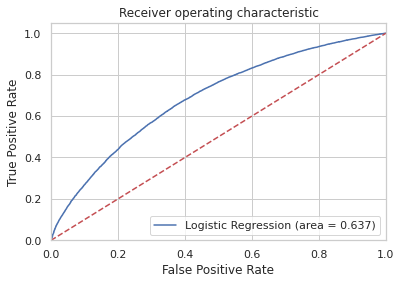

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('C:\\Projects\\Log_ROC') # локальный
plt.show()